In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.datasets import load_iris
from sklearn import tree

In [27]:
data =pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
real_x =data.iloc[:,0:30].values
real_y =data.iloc[:, 30].values

In [34]:
data.isnull().values.any()

False

Text(0, 0.5, 'frequency')

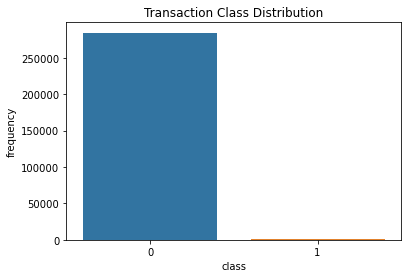

In [37]:
sns.countplot(real_y,data =data)
plt.title("Transaction Class Distribution")
plt.xlabel("class")
plt.ylabel("frequency")

In [38]:
normal =data[data["Class"]==0]
fraud =data[data["Class"]==1]

In [39]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
os =  RandomOverSampler()

In [42]:
new_real_x,new_real_y = os.fit_sample(real_x, real_y)

In [43]:
print(new_real_x.shape,new_real_y.shape)

(568630, 30) (568630,)


In [45]:
from collections import Counter

In [46]:
print('Original dataset shape {}'.format(Counter(real_y)))
print('Resampled dataset shape {}'.format(Counter(new_real_y)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [47]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler =StandardScaler()

In [51]:
new_real_x =scaler.fit_transform(new_real_x)

In [53]:
clf =tree.DecisionTreeClassifier(random_state = 0)

In [54]:
clf =clf.fit(new_real_x,new_real_y)

In [55]:
plt.figure(figsize =(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

[Text(158.27682605421685, 214.24235294117648, 'X[14] <= 0.359\ngini = 0.5\nsamples = 568630\nvalue = [284315, 284315]'),
 Text(83.89958584337349, 207.8470588235294, 'X[12] <= 0.363\ngini = 0.063\nsamples = 256305\nvalue = [8277, 248028]'),
 Text(60.23290662650602, 201.45176470588234, 'X[10] <= 0.883\ngini = 0.004\nsamples = 230504\nvalue = [464, 230040]'),
 Text(57.543749999999996, 195.0564705882353, 'X[11] <= -0.933\ngini = 0.003\nsamples = 230369\nvalue = [329, 230040]'),
 Text(54.85459337349398, 188.66117647058823, 'gini = 0.0\nsamples = 75\nvalue = [75, 0]'),
 Text(60.23290662650602, 188.66117647058823, 'X[16] <= 1.498\ngini = 0.002\nsamples = 230294\nvalue = [254, 230040]'),
 Text(57.543749999999996, 182.26588235294116, 'X[3] <= 0.627\ngini = 0.002\nsamples = 230274\nvalue = [234, 230040]'),
 Text(54.85459337349398, 175.87058823529412, 'X[1] <= 0.786\ngini = 0.002\nsamples = 230260\nvalue = [220, 230040]'),
 Text(52.16543674698795, 169.47529411764705, 'X[13] <= 2.736\ngini = 0.002

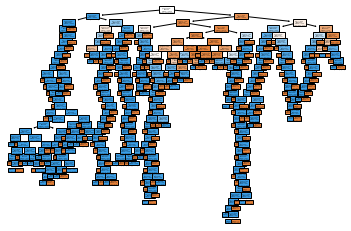

In [56]:
tree.plot_tree(clf,filled =True)

In [57]:
print(tree.export_text(clf))

|--- feature_14 <= 0.36
|   |--- feature_12 <= 0.36
|   |   |--- feature_10 <= 0.88
|   |   |   |--- feature_11 <= -0.93
|   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  -0.93
|   |   |   |   |--- feature_16 <= 1.50
|   |   |   |   |   |--- feature_3 <= 0.63
|   |   |   |   |   |   |--- feature_1 <= 0.79
|   |   |   |   |   |   |   |--- feature_13 <= 2.74
|   |   |   |   |   |   |   |   |--- feature_18 <= 2.09
|   |   |   |   |   |   |   |   |   |--- feature_14 <= 0.16
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= -4.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  -4.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |--- feature_14 >  0.16
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.90
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  0.90
|   | 